In [5]:
import pandas as pd # Importing libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("Fraud.csv") # Reading file

In [7]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [9]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [10]:
df.isnull().sum() # Check Null vaues

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [11]:
df.shape # show shapr of dataset

(6362620, 11)

In [12]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

# Columns of the dataset
step -> maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).<br>
type -> CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.<br>
amount -> amount of the transaction in local currency.<br>
nameOrig -> customer who started the transaction<br>
oldbalanceOrg -> initial balance before the transaction<br>
newbalanceOrig -> new balance after the transaction<br>
nameDest -> customer who is the recipient of the transaction<br>
oldbalanceDest -> initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).<br>
newbalanceDest -> new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).<br>
isFraud -> This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.<br>
isFlaggedFraud -> The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [14]:
df['hour_of_day'] = df['step']%24  # making hour column

In [15]:
df['day_of_week'] = ((df['step']/24)%7 + 1).astype('int64') # making day column

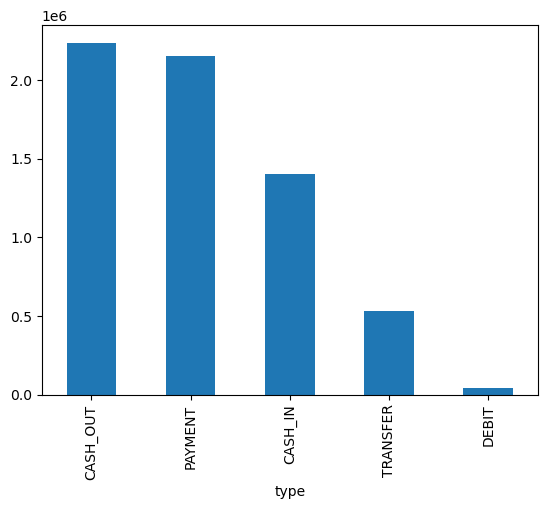

In [16]:
df['type'].value_counts().plot(kind = 'bar') # Bar plot for type column
plt.show()

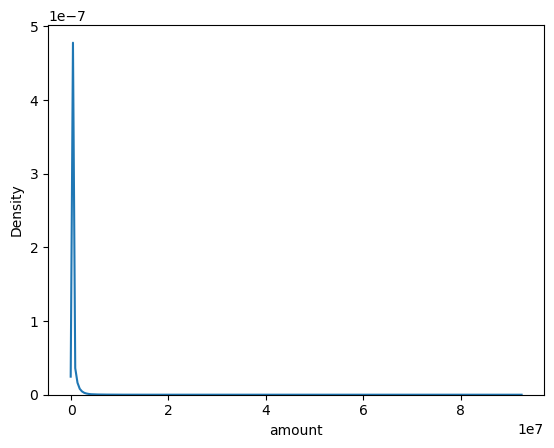

In [17]:
sns.kdeplot(data = df, x = 'amount') # KDE plot of amount column
plt.show()

In [18]:
df.sample(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,hour_of_day,day_of_week
5913656,404,PAYMENT,1627.13,C606588644,0.00,0.00,M1469531947,0.00,0.00,0,0,20,3
4700497,331,CASH_IN,215844.90,C974864419,54975.00,270819.90,C186113619,219279.39,0.00,0,0,19,7
4280721,307,PAYMENT,116.41,C718892825,0.00,0.00,M1016767563,0.00,0.00,0,0,19,6
2202549,185,CASH_OUT,140731.12,C1999510619,72343.00,0.00,C8428935,446361.34,587092.46,0,0,17,1
3375673,254,CASH_IN,207143.87,C660380090,1462338.40,1669482.27,C1744839097,424832.77,189772.87,0,0,14,4
5934311,404,CASH_OUT,3677.50,C71247069,216990.00,213312.50,C1580074395,420663.08,424340.58,0,0,20,3
1171630,132,CASH_OUT,25075.43,C1432826256,0.00,0.00,C900593096,133988.79,148038.53,0,0,12,6
4954322,351,CASH_IN,130635.22,C1930150828,22572591.68,22703226.89,C1576974192,170922.24,40287.02,0,0,15,1
4909987,349,CASH_IN,366633.19,C1665953859,175.00,366808.19,C1509538563,404110.43,37477.24,0,0,13,1
5298302,373,CASH_OUT,48320.34,C614542789,0.00,0.00,C636878126,2103477.58,2151797.92,0,0,13,2


In [19]:
df['is_merchant'] = df['nameDest'].apply(lambda s:1 if s.startswith('M') else 0) # making new column to check if the reciver is merchant or not

In [20]:
df['isFraud'].value_counts() # Counting if the transaction is fraud or not 

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [21]:
df[(df['is_merchant'] == 1)]['isFraud'].value_counts() # Checking if the merchant is fraud or not-fraud

isFraud
0    2151495
Name: count, dtype: int64

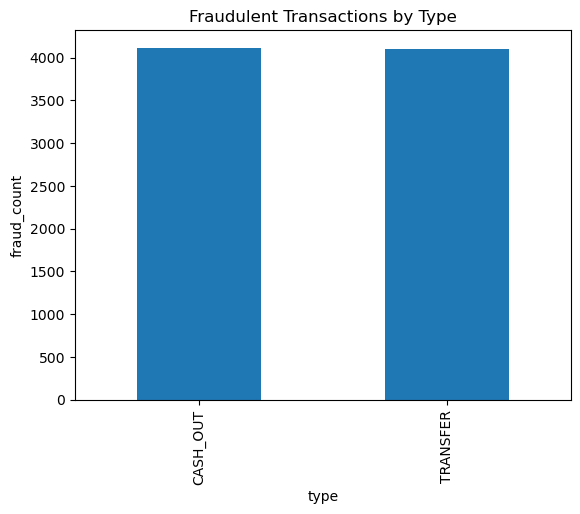

In [22]:
df[df['isFraud']==1]['type'].value_counts().plot(kind = 'bar')
plt.xlabel('type')
plt.ylabel('fraud_count')
plt.title('Fraudulent Transactions by Type')
plt.show()

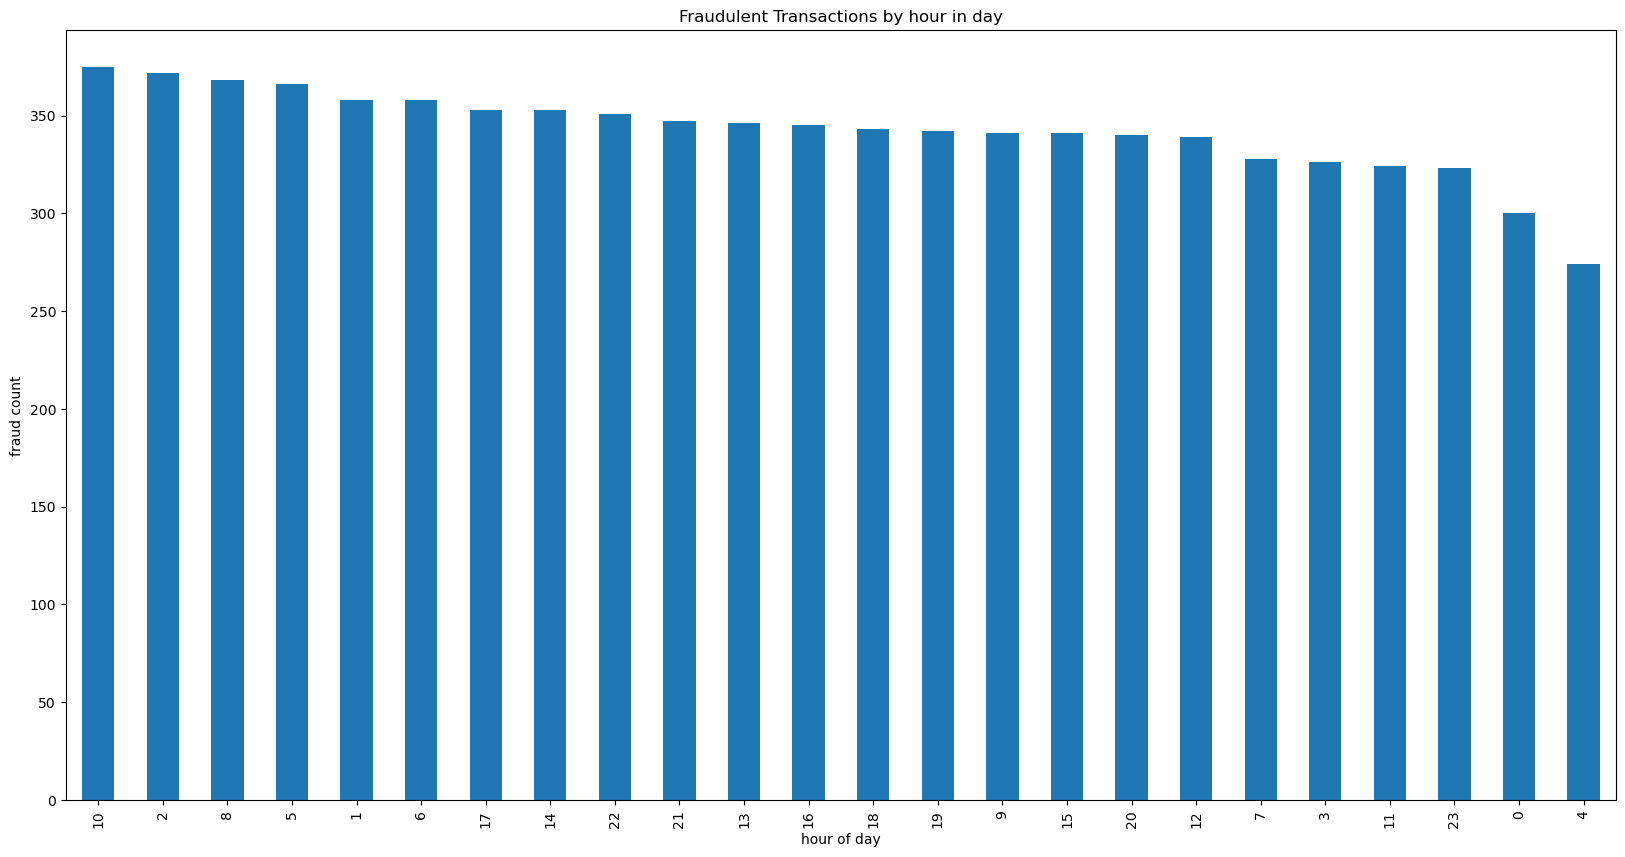

In [23]:
plt.figure(figsize=(20,10))
df[df['isFraud'] == 1]['hour_of_day'].value_counts().plot(kind = 'bar')
plt.xlabel('hour of day')
plt.ylabel('fraud count')
plt.title('Fraudulent Transactions by hour in day')
plt.show()

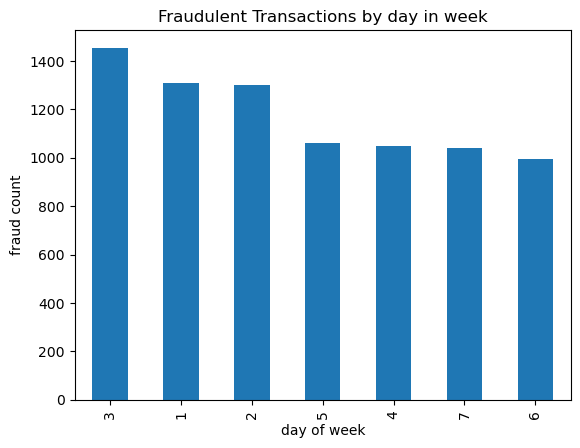

In [24]:
# plt.figure(figsize=(20,10))
df[df['isFraud'] == 1]['day_of_week'].value_counts().plot(kind = 'bar')
plt.xlabel('day of week')
plt.ylabel('fraud count')
plt.title('Fraudulent Transactions by day in week')
plt.show()

In [25]:
df[(df['newbalanceDest']==0) & (df['is_merchant']==0)]['isFraud'].value_counts()

isFraud
0    283847
1      4091
Name: count, dtype: int64

<Axes: >

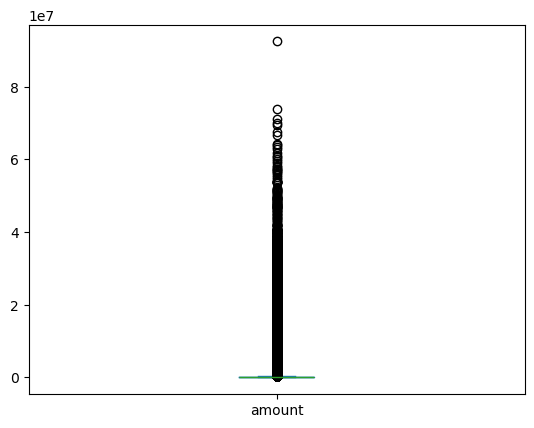

In [26]:
df['amount'].plot(kind = 'box') # Box plot for amount column to check the outliers

In [27]:
def outlier_handler(column): # Handling outlier
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    iqr = Q3 - Q1
    lower = Q1 - 1.5*iqr
    upper = Q3 + 1.5*iqr
    return lower,upper

In [28]:
lower,upper = outlier_handler('amount')

In [29]:
df[(df['amount']<lower) | (df['amount']>upper)]['isFraud'].value_counts()

isFraud
0    334224
1      3854
Name: count, dtype: int64

In [30]:
df['amount'] = np.log1p(df['amount']) # Log transfer to the amount column

<Axes: ylabel='Density'>

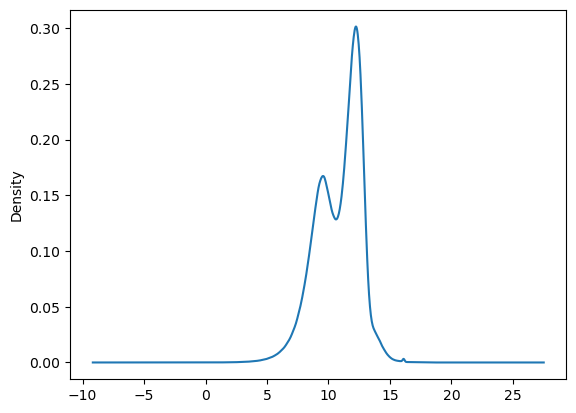

In [31]:
df['amount'].plot(kind = 'kde') # KDE plot for amount column

In [32]:
df[df['is_merchant']==1]['isFraud'].value_counts()

isFraud
0    2151495
Name: count, dtype: int64

In [33]:
df['changeOrig'] = df['newbalanceOrig'] - df['oldbalanceOrg'] # Column to store the changes in senders account
df['changeDest'] = df['newbalanceDest'] - df['oldbalanceDest'] # Column to store the changes in receivers account

In [34]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,hour_of_day,day_of_week,is_merchant,changeOrig,changeDest
0,1,PAYMENT,9.194276,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,1,1,1,-9839.64,0.0
1,1,PAYMENT,7.531166,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1,1,1,-1864.28,0.0
2,1,TRANSFER,5.204007,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,1,1,0,-181.00,0.0
3,1,CASH_OUT,5.204007,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1,1,0,-181.00,-21182.0
4,1,PAYMENT,9.364703,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,1,1,1,-11668.14,0.0


In [35]:
df.drop(columns=['step','nameOrig','oldbalanceOrg','newbalanceOrig','nameDest','oldbalanceDest','newbalanceDest'],inplace = True)

In [36]:
df.head()

,type,amount,isFraud,isFlaggedFraud,hour_of_day,day_of_week,is_merchant,changeOrig,changeDest
0,PAYMENT,9.194276,0,0,1,1,1,-9839.64,0.0
1,PAYMENT,7.531166,0,0,1,1,1,-1864.28,0.0
2,TRANSFER,5.204007,1,0,1,1,0,-181.00,0.0
3,CASH_OUT,5.204007,1,0,1,1,0,-181.00,-21182.0
4,PAYMENT,9.364703,0,0,1,1,1,-11668.14,0.0


In [37]:
df.columns

Index(['type', 'amount', 'isFraud', 'isFlaggedFraud', 'hour_of_day',
       'day_of_week', 'is_merchant', 'changeOrig', 'changeDest'],
      dtype='object')

In [38]:
df.dtypes

type               object
amount            float64
isFraud             int64
isFlaggedFraud      int64
hour_of_day         int64
day_of_week         int64
is_merchant         int64
changeOrig        float64
changeDest        float64
dtype: object

In [39]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score, confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder,StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import shap

In [40]:
x = df.drop(columns=['isFraud'])
y = df['isFraud']

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [42]:
x_train.head()

,type,amount,isFlaggedFraud,hour_of_day,day_of_week,is_merchant,changeOrig,changeDest
6271196,CASH_IN,12.864592,0,19,5,0,386385.07,-386385.08
1888243,CASH_IN,12.266508,0,20,7,0,212458.78,-212458.78
5549957,PAYMENT,9.901916,0,22,2,1,-3634.00,0.00
2025342,CASH_OUT,13.176127,0,12,1,0,-180216.00,527616.51
682342,TRANSFER,12.235966,0,12,2,0,0.00,206067.84


In [43]:
ohe = OneHotEncoder(drop = 'first',sparse_output=False)
label = LabelEncoder()
scaler = StandardScaler()
xgc = XGBClassifier()

In [44]:
trf = ColumnTransformer([
    ("ohe",ohe,[0]),
    ("scaler",scaler,['amount','changeOrig','changeDest'])
],remainder='passthrough')

# Handling imbalanced data

***1) Assigning weight to the class***

In [47]:
lr_bal = LogisticRegression(class_weight='balanced')
lr_weight = LogisticRegression(class_weight={0:1,1:10})
rf_bal = RandomForestClassifier(class_weight='balanced',n_estimators=10)
rf_weight = RandomForestClassifier(class_weight={0:1,1:10},n_estimators=10)

In [48]:
models = [lr_bal,lr_weight,rf_bal,rf_weight]
for model in models:
    pipe = Pipeline([
    ('trf1',trf),
    ('model',model)
    ])
    pipe.fit(x_train,y_train)
    y_pred = pipe.predict(x_test)
    print(f"Classification report for {model}")
    print("\n")
    print(classification_report(y_test,y_pred))

Classification report for LogisticRegression(class_weight='balanced')


              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1270904
           1       0.02      0.97      0.04      1620

    accuracy                           0.95   1272524
   macro avg       0.51      0.96      0.51   1272524
weighted avg       1.00      0.95      0.97   1272524

Classification report for LogisticRegression(class_weight={0: 1, 1: 10})


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.44      0.61      0.51      1620

    accuracy                           1.00   1272524
   macro avg       0.72      0.81      0.75   1272524
weighted avg       1.00      1.00      1.00   1272524

Classification report for RandomForestClassifier(class_weight='balanced', n_estimators=10)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   12709

***2) Assigning custom threshold value***

In [50]:
rf_weight = RandomForestClassifier(class_weight={0:1,1:10},n_estimators=10)
pipe = Pipeline([
    ('trf1',trf),
    ('lr',rf_weight)
])
pipe.fit(x_train,y_train)
y_prob=pipe.predict_proba(x_test)[:,1]
y_pred = (y_prob>0.4).astype(int)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.92      0.77      0.84      1620

    accuracy                           1.00   1272524
   macro avg       0.96      0.89      0.92   1272524
weighted avg       1.00      1.00      1.00   1272524



In [51]:
y_prob=pipe.predict_proba(x_test)[:,1]
y_pred = (y_prob>0.2).astype(int)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.77      0.80      0.79      1620

    accuracy                           1.00   1272524
   macro avg       0.89      0.90      0.89   1272524
weighted avg       1.00      1.00      1.00   1272524



***3) Sampling Techniques***

**i) Random Under Sampling**

In [114]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
x_sample, y_sample = rus.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x_sample,y_sample, test_size=0.2, random_state=42)
rf_weight = RandomForestClassifier(class_weight={0:1,1:10},n_estimators=10)
pipe = Pipeline([
    ('trf1',trf),
    ('rf',rf_weight)
])
pipe.fit(x_train,y_train)
y_prob=pipe.predict_proba(x_test)[:,1]
y_pred = (y_prob>0.4).astype(int)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1649
           1       0.96      0.98      0.97      1637

    accuracy                           0.97      3286
   macro avg       0.97      0.97      0.97      3286
weighted avg       0.97      0.97      0.97      3286



In [142]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
x_sample, y_sample = rus.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x_sample,y_sample, test_size=0.2, random_state=42)
x_test['type'] = LabelEncoder().fit_transform(x_test['type'])
x_train['type'] = LabelEncoder().fit_transform(x_train['type'])
rf_weight = RandomForestClassifier(class_weight={0:1,1:10},n_estimators=10)
rf_weight.fit(x_train,y_train)
y_prob=rf_weight.predict_proba(x_test)[:,1]
y_pred = (y_prob>0.4).astype(int)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1649
           1       0.97      0.98      0.97      1637

    accuracy                           0.97      3286
   macro avg       0.97      0.97      0.97      3286
weighted avg       0.97      0.97      0.97      3286



**ii) Random Over Sampling**

In [56]:
from imblearn.over_sampling import RandomOverSampler
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
ros = RandomOverSampler(random_state=42)
x_sample, y_sample = ros.fit_resample(x_train, y_train)

rf_weight = RandomForestClassifier(class_weight={0:1, 1:10}, n_estimators=10, random_state=42)
pipe = Pipeline([
    ('trf1', trf),
    ('rf', rf_weight)
])

pipe.fit(x_sample, y_sample)

y_prob = pipe.predict_proba(x_test)[:, 1]
y_pred = (y_prob > 0.2).astype(int)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.70      0.81      0.75      1643

    accuracy                           1.00   1272524
   macro avg       0.85      0.90      0.87   1272524
weighted avg       1.00      1.00      1.00   1272524



**iii) SMOTENC**

In [58]:
from imblearn.over_sampling import SMOTENC
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
col_indx = [0, 2, 3, 4, 5]  
smote = SMOTENC(categorical_features=col_indx, random_state=42)
x_sample, y_sample = smote.fit_resample(x_train, y_train)
rf_weight = RandomForestClassifier(class_weight={0:1, 1:10}, n_estimators=10, random_state=42)
pipe = Pipeline([
    ('trf1', trf),
    ('rf', rf_weight)
])

pipe.fit(x_sample, y_sample)

y_prob = pipe.predict_proba(x_test)[:, 1]
y_pred = (y_prob > 0.4).astype(int)
print(classification_report(y_test, y_pred))

# Key findings
**1) The Dataset is highly imbalance(only 0.129% of transactions are fraudulent) containing 6.3 Million samples and 11 features.<br>
2) No Missing values.<br>
3) Created New features("hour_of_day","day_of_week","is_merchant","changeOrig","changeDest") using existing features.<br>
4) No fraud transactions were detected when the person was a merchant.<br>
5) Fraud transactions were found only in "Cash Out" and "Transfer" transaction types<br>
6) Tuesday showed the highest risk of fraud among all days of the week.<br>
7) Found many Outliers in amount column.<br>
8) Handled imbalanced data using different techniques like assigning custom threshold values, resampling techniques(OverSampling, UnderSampling, SMOTENC) and assigning weight to the class.<br>
9) Used SHAP to visualise which feature is important for the model.**

# Final Model
**Among all the models and data balancing techniques, the Random Forest classifier with class weights{0: 1, 1: 10} performed the best.
It have a higher recall compared to other models, which is crucial in fraud detection since identifying fraudulent transactions is more important than minimizing false positives.**

In [159]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
rf_weight = RandomForestClassifier(class_weight={0:1,1:10},n_estimators=10)
pipe = Pipeline([
    ('trf1',trf),
    ('lr',rf_weight)
])
pipe.fit(x_train,y_train)
y_prob=pipe.predict_proba(x_test)[:,1]
y_pred = (y_prob>0.2).astype(int)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.77      0.80      0.79      1620

    accuracy                           1.00   1272524
   macro avg       0.89      0.90      0.89   1272524
weighted avg       1.00      1.00      1.00   1272524



In [169]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
x_test['type'] = LabelEncoder().fit_transform(x_test['type'])
x_train['type'] = LabelEncoder().fit_transform(x_train['type'])
rf_weight = RandomForestClassifier(class_weight={0:1,1:10},n_estimators=10)
rf_weight.fit(x_train,y_train)
y_prob=rf_weight.predict_proba(x_test)[:,1]
y_pred = (y_prob>0.2).astype(int)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.79      0.80      0.79      1620

    accuracy                           1.00   1272524
   macro avg       0.89      0.90      0.90   1272524
weighted avg       1.00      1.00      1.00   1272524



100%|===================| 2544914/2545048 [88:46<00:00]        

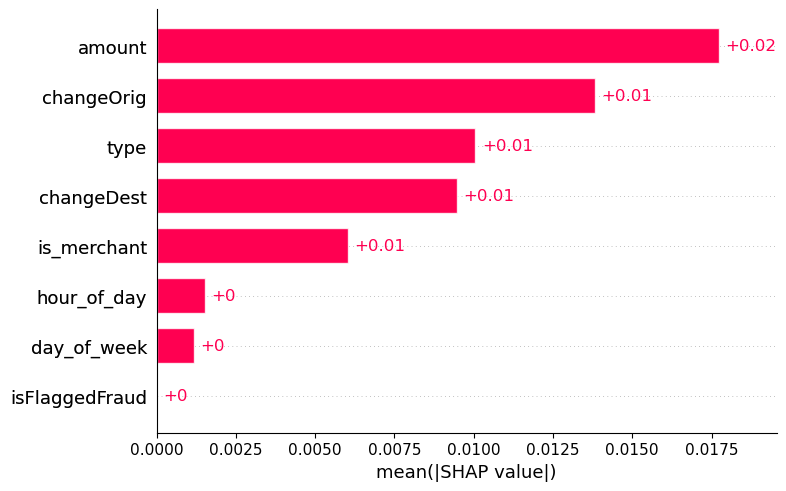

In [167]:
explainer = shap.Explainer(rf_weight,x_train)
shap_values = explainer(x_test,check_additivity=False)
shap_values_class1 = shap.Explanation(
    values=shap_values[:, :, 1],       
    base_values=explainer.expected_value[1],
    data=x_test,
    feature_names=x_test.columns
)

shap.plots.bar(shap_values_class1,max_display=8)